<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [48]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
          Living With Spouse & At Least One Child In Household  \
year                                                             
2024                                             271800          
2023                                             243700          
2022                                             255800          
2021                                             221800          
2020                                             214600          
2019                                             183900          
2018                                             180500          
2017                                             173400          
2016                                             165900          
2015                                             166000          
2014                                             168100          
2013                                             150000          
2012                                             1372

✅ Created relation dataset with 13 overlapping years
📊 Years in analysis: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
🔍 GENERATING COMPREHENSIVE RELATIONAL ANALYSIS

📊 RELATIONAL DATASET:
 Year Residents_65Plus NursingHomeBeds  BedsPer1000Residents  CoverageRatio_Pct  Residents_Growth_Pct  Beds_Growth_Pct
 2010          340,700           9,551                 28.03               2.80                   NaN              NaN
 2011          370,300           9,690                 26.17               2.62                  8.69             1.46
 2012          389,800           9,721                 24.94               2.49                  5.27             0.32
 2013          413,100          10,838                 26.24               2.62                  5.98            11.49
 2014          466,300          10,968                 23.52               2.35                 12.88             1.20
 2015          460,900          12,185                 26.44   

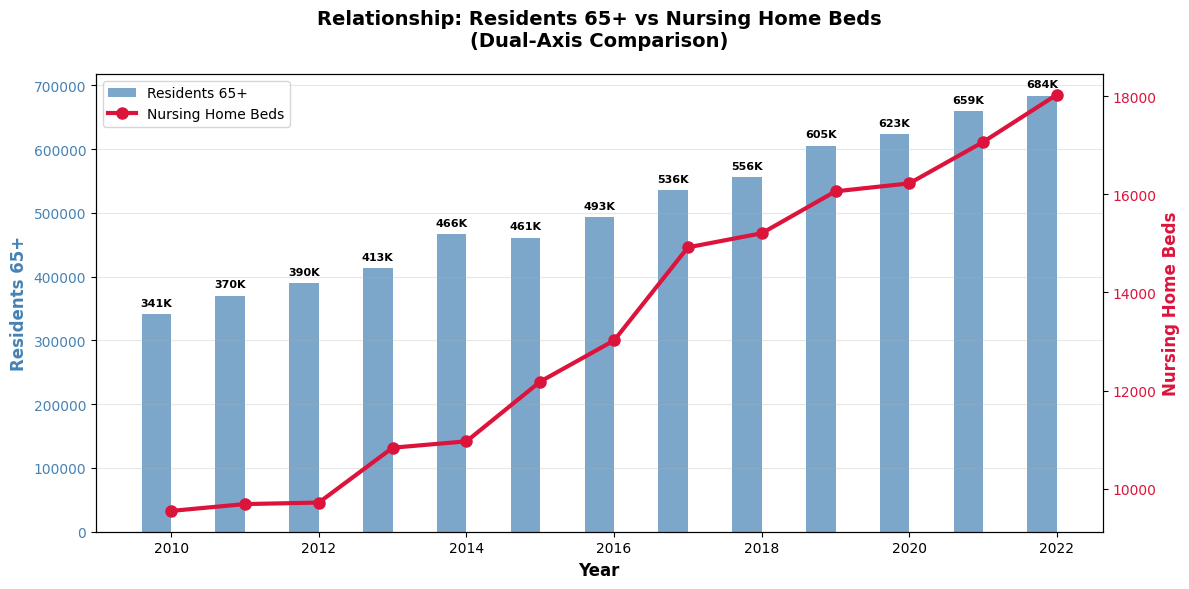

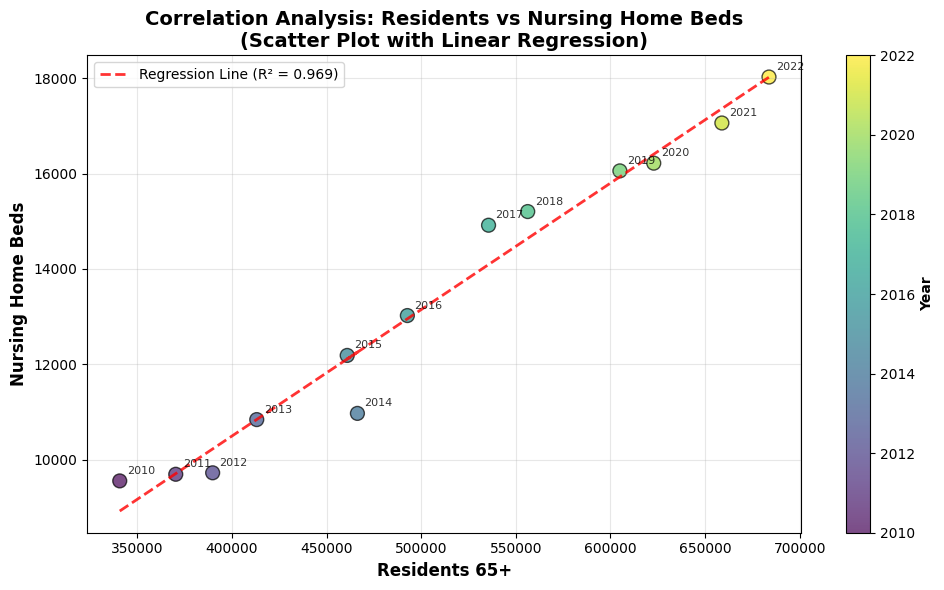


📈 CORRELATION STATISTICS:
   Correlation Coefficient: 0.9844
   R-squared Value: 0.9691
   Regression Equation: Beds = 0.0265 × Residents + -125
   P-value: 0.000000


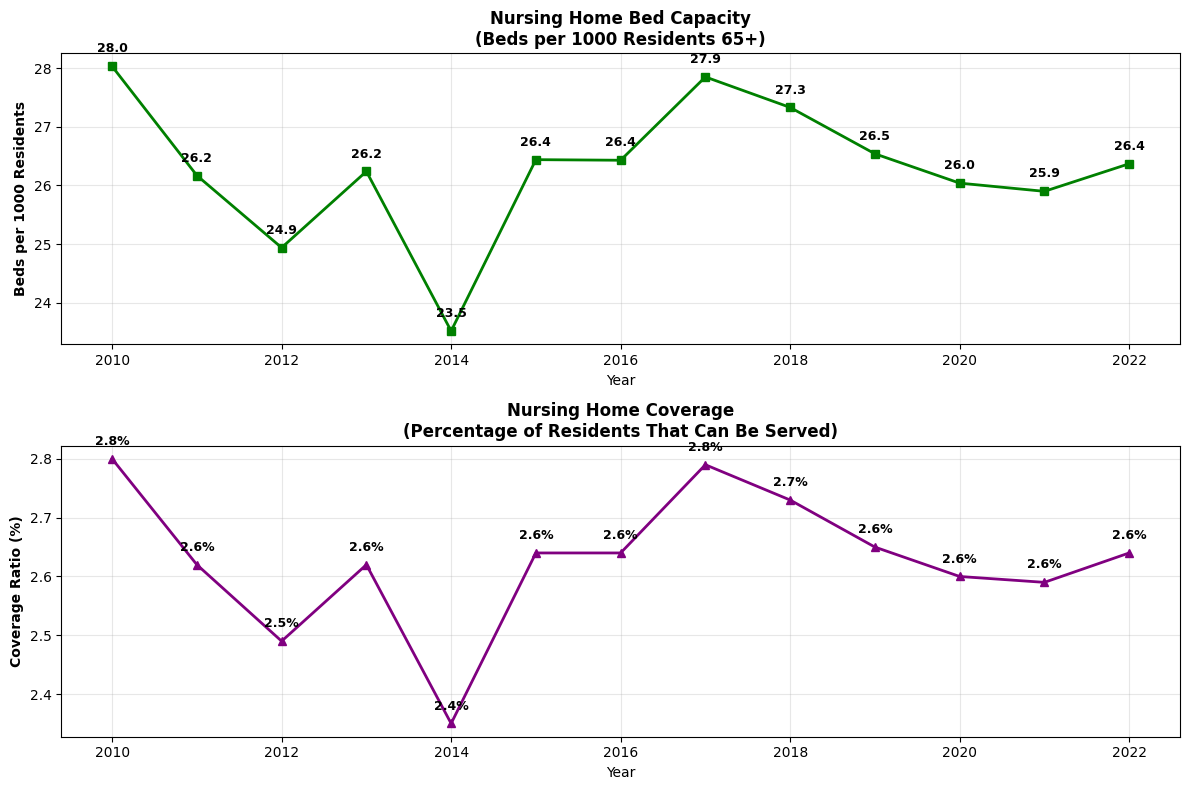

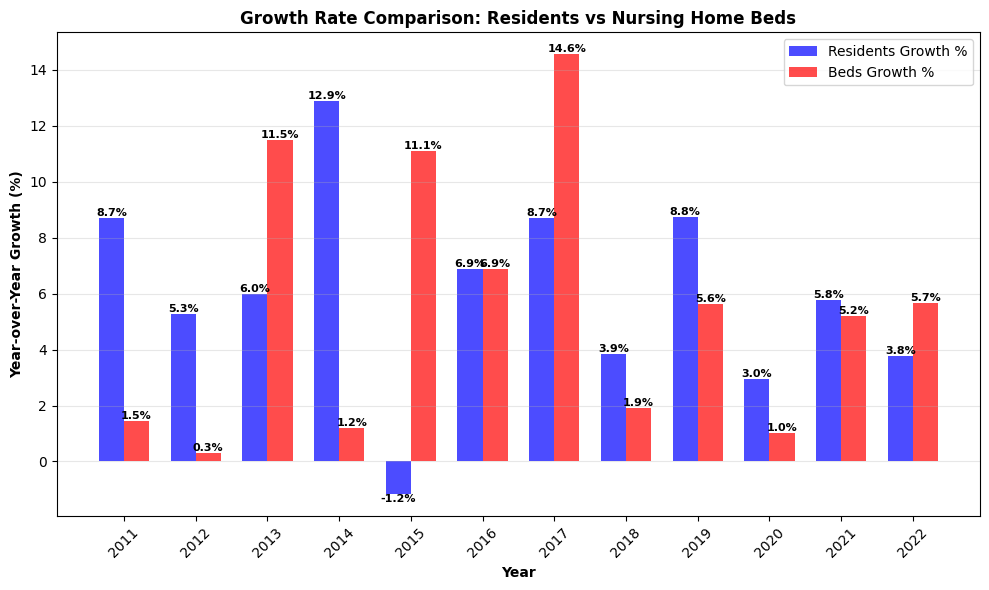


📋 COMPREHENSIVE SUMMARY REPORT
Analysis Period: 2010 - 2022
Years Analyzed: 13
Correlation Strength: 0.984

📈 POPULATION TRENDS:
  • Residents 65+ growth: 100.7%
  • Nursing home beds growth: 88.8%
  • Relative capacity change: -11.9%

🏥 CURRENT CAPACITY (2022):
  • Residents 65+: 683,800.0
  • Nursing Home Beds: 18,029.0
  • Beds per 1000 residents: 26.4
  • Coverage ratio: 2.6%

💡 KEY INSIGHTS:
  • STRONG POSITIVE correlation: Bed capacity closely follows population growth
  • 📊 MODERATE COVERAGE: Adequate but monitor trends


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

class ElderlyHealthcareRelationAnalyzer:
    def __init__(self):
        self.residents_data = None
        self.nursing_home_data = None
        self.relation_data = None

    def load_residents_data(self, file_path):
        """
        Load and preprocess the residents 65+ data
        """
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Clean column names
            df.columns = [col.strip() for col in df.columns]

            # Ensure 'year' column exists and is integer
            if 'year' not in df.columns:
                print("Warning: 'year' column not found. Using first column as year.")
                df = df.rename(columns={df.columns[0]: 'year'})

            df['year'] = df['year'].astype(int)

            # Select only necessary columns
            required_cols = ['year', 'Total']
            available_cols = [col for col in required_cols if col in df.columns]

            if 'Total' not in df.columns:
                print("Warning: 'Total' column not found. Please check data structure.")
                return None

            residents_data = df[available_cols].copy()
            residents_data = residents_data.rename(columns={'year': 'Year', 'Total': 'Residents_65Plus'})

            self.residents_data = residents_data
            print(f"✅ Successfully loaded residents data for {len(residents_data)} years: {list(residents_data['Year'])}")
            return residents_data

        except Exception as e:
            print(f"❌ Error loading residents data: {e}")
            return None

    def load_nursing_home_data(self, file_path):
        """
        Load and preprocess nursing home beds data
        """
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Clean the data - remove empty rows if any
            df = df.dropna(subset=['year'])

            # Select relevant columns and ensure correct data types
            nursing_home_data = df[['year', 'No_Beds']].copy()
            nursing_home_data['year'] = nursing_home_data['year'].astype(int)
            nursing_home_data.columns = ['Year', 'NursingHomeBeds']

            self.nursing_home_data = nursing_home_data
            print(f"✅ Successfully loaded nursing home data for {len(nursing_home_data)} years: {list(nursing_home_data['Year'])}")
            return nursing_home_data

        except Exception as e:
            print(f"❌ Error loading nursing home data: {e}")
            return None

    def create_relation_dataset(self):
        """
        Combine residents and nursing home data to create relational dataset
        """
        if self.residents_data is not None and self.nursing_home_data is not None:
            # Merge datasets on Year
            self.relation_data = pd.merge(
                self.residents_data,
                self.nursing_home_data,
                on='Year',
                how='inner'
            ).sort_values('Year')

            # Calculate additional metrics
            self.relation_data['BedsPer1000Residents'] = (
                self.relation_data['NursingHomeBeds'] /
                self.relation_data['Residents_65Plus'] * 1000
            ).round(2)

            self.relation_data['CoverageRatio_Pct'] = (
                self.relation_data['NursingHomeBeds'] /
                self.relation_data['Residents_65Plus'] * 100
            ).round(2)

            # Calculate year-over-year growth rates
            self.relation_data['Residents_Growth_Pct'] = (
                self.relation_data['Residents_65Plus'].pct_change() * 100
            ).round(2)

            self.relation_data['Beds_Growth_Pct'] = (
                self.relation_data['NursingHomeBeds'].pct_change() * 100
            ).round(2)

            print(f"✅ Created relation dataset with {len(self.relation_data)} overlapping years")
            print(f"📊 Years in analysis: {list(self.relation_data['Year'])}")
            return self.relation_data
        else:
            print("❌ Please load both datasets first")
            return None

    def plot_dual_axis_relation(self, figsize=(12, 6)):
        """
        Create dual-axis relational graph showing residents vs nursing home beds
        """
        if self.relation_data is None:
            print("❌ No relation data available")
            return

        fig, ax1 = plt.subplots(figsize=figsize)

        # Primary axis - Residents (Bar chart)
        color1 = 'steelblue'
        bars = ax1.bar(self.relation_data['Year'] - 0.2,
                      self.relation_data['Residents_65Plus'],
                      width=0.4, alpha=0.7, color=color1,
                      label='Residents 65+')
        ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Residents 65+', color=color1, fontsize=12, fontweight='bold')
        ax1.tick_params(axis='y', labelcolor=color1)
        ax1.grid(True, alpha=0.3, axis='y')

        # Secondary axis - Nursing Home Beds (Line chart)
        ax2 = ax1.twinx()
        color2 = 'crimson'
        line = ax2.plot(self.relation_data['Year'],
                       self.relation_data['NursingHomeBeds'],
                       color=color2, marker='o', linewidth=3,
                       markersize=8, label='Nursing Home Beds')
        ax2.set_ylabel('Nursing Home Beds', color=color2, fontsize=12, fontweight='bold')
        ax2.tick_params(axis='y', labelcolor=color2)

        # Title and legends
        plt.title('Relationship: Residents 65+ vs Nursing Home Beds\n(Dual-Axis Comparison)',
                 fontsize=14, fontweight='bold', pad=20)

        # Combine legends
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        # Add value annotations on bars
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 10000,
                    f'{height/1000:.0f}K', ha='center', va='bottom',
                    fontsize=8, fontweight='bold')

        plt.tight_layout()
        plt.show()

        return fig

    def plot_correlation_scatter(self, figsize=(10, 6)):
        """
        Create scatter plot with correlation analysis
        """
        if self.relation_data is None:
            print("❌ No relation data available")
            return

        fig, ax = plt.subplots(figsize=figsize)

        residents = self.relation_data['Residents_65Plus']
        beds = self.relation_data['NursingHomeBeds']
        years = self.relation_data['Year']

        # Create scatter plot colored by year
        scatter = ax.scatter(residents, beds, c=years, cmap='viridis',
                           s=100, alpha=0.7, edgecolors='black')

        # Calculate and plot regression line
        slope, intercept, r_value, p_value, std_err = linregress(residents, beds)
        regression_line = slope * residents + intercept

        ax.plot(residents, regression_line, 'r--', alpha=0.8, linewidth=2,
               label=f'Regression Line (R² = {r_value**2:.3f})')

        # Add year labels to points
        for i, (x, y, year) in enumerate(zip(residents, beds, years)):
            ax.annotate(str(year), (x, y), textcoords="offset points",
                       xytext=(5,5), ha='left', fontsize=8, alpha=0.8)

        ax.set_xlabel('Residents 65+', fontsize=12, fontweight='bold')
        ax.set_ylabel('Nursing Home Beds', fontsize=12, fontweight='bold')
        ax.set_title('Correlation Analysis: Residents vs Nursing Home Beds\n(Scatter Plot with Linear Regression)',
                    fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Year', fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Print correlation statistics
        print(f"\n📈 CORRELATION STATISTICS:")
        print(f"   Correlation Coefficient: {r_value:.4f}")
        print(f"   R-squared Value: {r_value**2:.4f}")
        print(f"   Regression Equation: Beds = {slope:.4f} × Residents + {intercept:.0f}")
        print(f"   P-value: {p_value:.6f}")

        return fig, r_value

    def plot_capacity_metrics(self, figsize=(12, 8)):
        """
        Plot capacity-related metrics over time
        """
        if self.relation_data is None:
            print("❌ No relation data available")
            return

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

        # Plot 1: Beds per 1000 residents
        ax1.plot(self.relation_data['Year'],
                self.relation_data['BedsPer1000Residents'],
                marker='s', color='green', linewidth=2, markersize=6)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Beds per 1000 Residents', fontweight='bold')
        ax1.set_title('Nursing Home Bed Capacity\n(Beds per 1000 Residents 65+)',
                     fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Add value annotations
        for year, value in zip(self.relation_data['Year'],
                              self.relation_data['BedsPer1000Residents']):
            ax1.annotate(f'{value:.1f}', (year, value),
                        textcoords="offset points", xytext=(0,10),
                        ha='center', fontsize=9, fontweight='bold')

        # Plot 2: Coverage ratio
        ax2.plot(self.relation_data['Year'],
                self.relation_data['CoverageRatio_Pct'],
                marker='^', color='purple', linewidth=2, markersize=6)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Coverage Ratio (%)', fontweight='bold')
        ax2.set_title('Nursing Home Coverage\n(Percentage of Residents That Can Be Served)',
                     fontweight='bold')
        ax2.grid(True, alpha=0.3)

        # Add value annotations
        for year, value in zip(self.relation_data['Year'],
                              self.relation_data['CoverageRatio_Pct']):
            ax2.annotate(f'{value:.1f}%', (year, value),
                        textcoords="offset points", xytext=(0,10),
                        ha='center', fontsize=9, fontweight='bold')

        plt.tight_layout()
        plt.show()

        return fig

    def plot_growth_comparison(self, figsize=(10, 6)):
        """
        Plot growth rate comparison between residents and beds
        """
        if self.relation_data is None:
            print("❌ No relation data available")
            return

        # Use data from second year onwards (no growth for first year)
        growth_data = self.relation_data.iloc[1:].copy()

        fig, ax = plt.subplots(figsize=figsize)

        width = 0.35
        x = np.arange(len(growth_data['Year']))

        bars1 = ax.bar(x - width/2, growth_data['Residents_Growth_Pct'],
                      width, label='Residents Growth %',
                      alpha=0.7, color='blue')
        bars2 = ax.bar(x + width/2, growth_data['Beds_Growth_Pct'],
                      width, label='Beds Growth %',
                      alpha=0.7, color='red')

        ax.set_xlabel('Year', fontweight='bold')
        ax.set_ylabel('Year-over-Year Growth (%)', fontweight='bold')
        ax.set_title('Growth Rate Comparison: Residents vs Nursing Home Beds',
                    fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(growth_data['Year'], rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
                        fontsize=8, fontweight='bold')

        plt.tight_layout()
        plt.show()

        return fig

    def generate_comprehensive_analysis(self):
        """
        Generate comprehensive relational analysis with all graphs
        """
        if self.relation_data is None:
            print("❌ Please create relation dataset first")
            return

        print("🔍 GENERATING COMPREHENSIVE RELATIONAL ANALYSIS")
        print("="*60)

        # Display the relational data
        print("\n📊 RELATIONAL DATASET:")
        display_df = self.relation_data.copy()
        display_df['Residents_65Plus'] = display_df['Residents_65Plus'].apply(lambda x: f"{x:,}")
        display_df['NursingHomeBeds'] = display_df['NursingHomeBeds'].apply(lambda x: f"{x:,}")
        print(display_df.to_string(index=False))

        # Generate all plots
        self.plot_dual_axis_relation()
        self.plot_correlation_scatter()
        self.plot_capacity_metrics()
        self.plot_growth_comparison()

        # Generate summary report
        self._generate_summary_report()

    def _generate_summary_report(self):
        """
        Generate a comprehensive summary report
        """
        latest_year = self.relation_data['Year'].max()
        latest_data = self.relation_data[self.relation_data['Year'] == latest_year].iloc[0]
        first_data = self.relation_data[self.relation_data['Year'] == self.relation_data['Year'].min()].iloc[0]

        # Calculate overall growth
        residents_growth = ((latest_data['Residents_65Plus'] / first_data['Residents_65Plus']) - 1) * 100
        beds_growth = ((latest_data['NursingHomeBeds'] / first_data['NursingHomeBeds']) - 1) * 100

        # Calculate correlation
        correlation = self.relation_data['Residents_65Plus'].corr(self.relation_data['NursingHomeBeds'])

        print("\n📋 COMPREHENSIVE SUMMARY REPORT")
        print("="*50)
        print(f"Analysis Period: {self.relation_data['Year'].min()} - {latest_year}")
        print(f"Years Analyzed: {len(self.relation_data)}")
        print(f"Correlation Strength: {correlation:.3f}")

        print(f"\n📈 POPULATION TRENDS:")
        print(f"  • Residents 65+ growth: {residents_growth:.1f}%")
        print(f"  • Nursing home beds growth: {beds_growth:.1f}%")
        print(f"  • Relative capacity change: {beds_growth - residents_growth:.1f}%")

        print(f"\n🏥 CURRENT CAPACITY ({latest_year}):")
        print(f"  • Residents 65+: {latest_data['Residents_65Plus']:,}")
        print(f"  • Nursing Home Beds: {latest_data['NursingHomeBeds']:,}")
        print(f"  • Beds per 1000 residents: {latest_data['BedsPer1000Residents']:.1f}")
        print(f"  • Coverage ratio: {latest_data['CoverageRatio_Pct']:.1f}%")

        print(f"\n💡 KEY INSIGHTS:")
        if correlation > 0.7:
            print("  • STRONG POSITIVE correlation: Bed capacity closely follows population growth")
        elif correlation > 0.4:
            print("  • MODERATE correlation: Some relationship between population and capacity")
        else:
            print("  • WEAK correlation: Capacity changes don't closely follow population trends")

        if latest_data['CoverageRatio_Pct'] < 2.5:
            print("  • ⚠️  LOW COVERAGE: Potential capacity shortage")
        elif latest_data['CoverageRatio_Pct'] < 3.5:
            print("  • 📊 MODERATE COVERAGE: Adequate but monitor trends")
        else:
            print("  • ✅ GOOD COVERAGE: Sufficient bed capacity")

        print("="*50)

# Example usage function
def run_complete_analysis(residents_file, nursing_home_file):
    """
    Complete analysis function that loads data and generates all relational graphs
    """
    # Initialize analyzer
    analyzer = ElderlyHealthcareRelationAnalyzer()

    # Load datasets
    print("📂 LOADING DATASETS...")
    residents_data = analyzer.load_residents_data(residents_file)
    nursing_home_data = analyzer.load_nursing_home_data(nursing_home_file)

    if residents_data is None or nursing_home_data is None:
        print("❌ Failed to load datasets. Please check file paths and formats.")
        return None

    # Create relational dataset
    print("\n🔗 CREATING RELATIONAL DATASET...")
    relation_data = analyzer.create_relation_dataset()

    if relation_data is None:
        print("❌ No overlapping years found between datasets.")
        return None

    # Generate comprehensive analysis
    print("\n📊 GENERATING RELATIONAL ANALYSIS...")
    analyzer.generate_comprehensive_analysis()

    return analyzer

# For direct execution with the provided data
if __name__ == "__main__":
    # Since we have the actual data content, we'll create DataFrames directly
    analyzer = ElderlyHealthcareRelationAnalyzer()

    # Create residents data from provided content
    residents_data = pd.DataFrame({
        'Year': [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
        'Residents_65Plus': [767900, 708700, 683800, 658900, 622900, 605000, 556300, 535600, 492700, 460900, 466300, 413100, 389800, 370300, 340700]
    })
    analyzer.residents_data = residents_data

    # Create nursing home data from provided content
    nursing_home_data = pd.DataFrame({
        'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'NursingHomeBeds': [9442, 9551, 9690, 9721, 10838, 10968, 12185, 13022, 14918, 15205, 16059, 16221, 17064, 18029]
    })
    # Filter to match available years (2010-2022)
    nursing_home_data = nursing_home_data[nursing_home_data['Year'] >= 2010]
    analyzer.nursing_home_data = nursing_home_data

    # Run analysis
    analyzer.create_relation_dataset()
    analyzer.generate_comprehensive_analysis()